In [ ]:
using DifferentialEquations
using Plots

function main()
    prob = ODEProblem(ev_model!, u, t, p)
    sol = solve(prob)
    p1 = plot(sol, idxs = 1, label="Eletrical Vehicles", xlabel="Time", ylabel="Quantity", dpi=100, linewidth=3)
    p2 = plot(sol, idxs = 2, label="Charging Stations", xlabel="Time", ylabel="Quantity", dpi=100, linewidth=3)
    p3 = plot(sol, idxs = 3, label="Spending", xlabel="Time", ylabel="Quantity", dpi=100, linewidth=3)
    p4 = plot(sol, idxs = (1, 2), label="A line", xlabel="CHG", ylabel="EV", dpi=100, linewidth=3)
    plot(p1, p2, p3, p4, layout = (2, 2))
    # return EV[end], CHG[end], spending[end]
end


function ev_model!(du, u, p, t) # add spending carrying capactiy | fix spending logic | 
    EV, CHG, Spending = u
    N, M, RB0, GF0, rEV, rCHG, c = p

    RB = RB0 / (1 + EV/N)
    GF = GF0 / (1 + CHG/M)


    du[1] = (rEV * EV * (1 - (EV/N)) * (CHG/EV) / (c + (CHG/EV)) + RB * (1 - (EV/N))) # 
    du[2] = (rCHG * ((EV/c) - CHG) + GF * ((EV/c) - CHG)) #
    du[3] = (EV * RB - Spending) # 
end

ev_model! (generic function with 1 method)

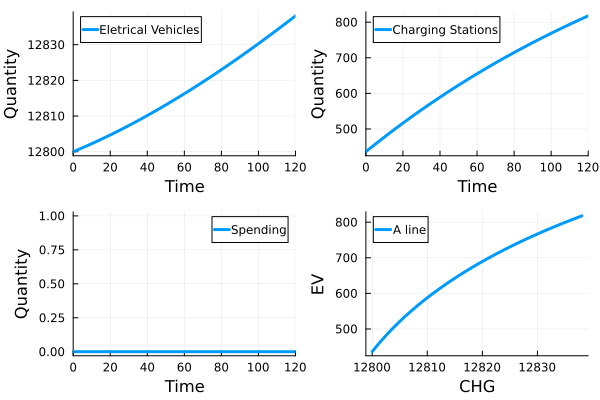

In [39]:
u = [12_800, 436, 0] # EV, CHG (Initial)
p = 1_063_446, 2_000, 0, 0, 0.005, 0.005, 10 # EV, CHG (Capactiy), RB, GF (Initial), rEV, rCHG (base ratio), 1:10 ratio
t = (0.0, 120.0)

main()

In [ ]:
for i in 0:500:5_000_000
    for j in 0:500:5_000_000
        if i + j < 5_000_000
            p = 1_063_446, 2_000, i, j, 0.005, 0.005, 10 # EV, CHG (Capactiy), RB, GF (Initial), rEV, rCHG (base ratio), 1:10 ratio

            main()
        end
    end
end
        

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file://c:/Users/maxth/OneDrive/Desktop/Visual Code/MTH455/Projects/Project_2_Planning_for_an_Electric_Future/In[40]#7:9\[90mIn[40]:7:9[0;0m]8;;\
            main()
        [48;2;120;70;70m[0;0m
[90m#       └ ── [0;0m[91mExpected `end`[0;0m